In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [84]:
df = pd.read_csv("src/train.csv")

In [85]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [88]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [89]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cleaning & Feature Engineering

### Numerical Variables

In [90]:
dfnum = df.select_dtypes('number')

In [91]:
dfnum

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


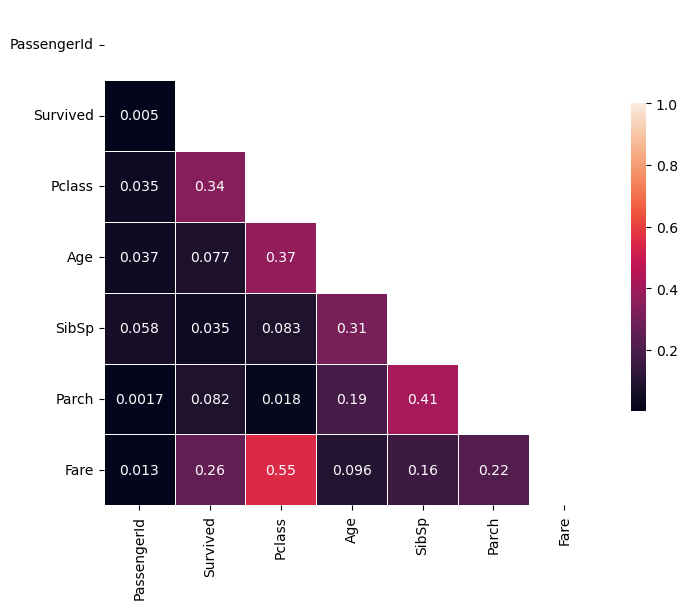

In [92]:
corr=np.abs(dfnum.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Categorical variables

In [93]:
cabin_letters = []
for cabin in df.Cabin:
    if pd.isna(cabin):
        cabin_letters.append("Unknown")
    else:
        cabin_letters.append(cabin[0])

df['cabin_letters'] = cabin_letters
df.drop(columns=['Cabin'], inplace=True)
cabin_dummies = pd.get_dummies(df['cabin_letters'], prefix='cabin', dtype=int)
df = pd.concat([df.drop(columns=['cabin_letters']), cabin_dummies], axis=1)

In [94]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0,0,0,0,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0,1,0,0,0,0,0,0


In [95]:
df.dropna(inplace=True)

In [96]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [97]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [98]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='embarked', dtype=int)
df = pd.concat([df.drop(columns=['Embarked']), embarked_dummies], axis=1)
sex_dummies = pd.get_dummies(df['Sex'], drop_first=True, dtype=int)
df = pd.concat([df.drop(columns=['Sex']), sex_dummies], axis=1)

In [99]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

## Clean nulls

In [100]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_Unknown,embarked_C,embarked_Q,embarked_S,male
0,1,0,3,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,1,0,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,1,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,0,0,0,0,0,0,0,0,1,0,1,0,0
886,887,0,2,27.0,0,0,13.0000,0,0,0,0,0,0,0,0,1,0,0,1,1
887,888,1,1,19.0,0,0,30.0000,0,1,0,0,0,0,0,0,0,0,0,1,0
889,890,1,1,26.0,0,0,30.0000,0,0,1,0,0,0,0,0,0,1,0,0,1


## Export

In [101]:
df.to_csv('data/train2.csv')